In [24]:
import pandas as pd
import datetime
import dateutil
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table

In [6]:
df = pd.read_csv("events/events_dataframe_en.csv", converters={'redirects': pd.eval, 'list_views_7_days':pd.eval})
df.head(5)

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean
0,2023 South Sudanese general election,2015-07-01T00:00:00Z,Global South,Africa,politics,"['Category:2023 elections in Africa', 'Categor...",166,0.0,0,0,0,0.0,0,[],-703,2015,planed,not_surprising,before,0.000000
1,2015 Swedish Open,2015-07-01T00:00:00Z,Global North,Europe,sports,"['Category:2015 ATP World Tour', 'Category:201...",2714,0.0,0,0,0,0.0,0,"[304, 296, 356, 356, 414, 449, 539]",-11,2015,planed,not_surprising,before,387.714286
2,2015 Ji'an bus accident,2015-07-01T00:00:00Z,Global South,Asia,disaster,"['Category:2015 disasters in China', 'Category...",1161,0.0,0,0,0,0.0,0,"[60, 507, 103, 148, 143, 200]",1,2015,not_planed,surprising,surprising,193.500000
3,2015 Chama Cha Mapinduzi presidential primaries,2015-07-01T00:00:00Z,Global South,Africa,politics,"['Category:2015 elections in Tanzania', 'Categ...",1069,0.0,0,0,0,0.0,0,[],-1,2015,planed,not_surprising,before,0.000000
4,Aleppo offensive (July 2015),2015-07-02T00:00:00Z,Global South,Asia,disaster,"['Category:Aleppo in the Syrian civil war', 'C...",2372,0.0,0,0,0,0.0,0,"[777, 1595]",5,2015,not_planed,not_surprising,after,1186.000000


In [7]:
# views_7_days_mean   ... mean of views wihtin 7 days after event
# list_views_7_days   ... list of views within 7 days after event
# views_7_sum         ... sum of views within 7 days after event (incl. redirects)
# views_before_mean   ... mean of views 7 days before event
# views_before_min    ... min of views 7 days before event
# ...

In [8]:
df_zero = df[df["views_7_sum"] == 0]
df = df[df["views_7_sum"] != 0]
df = df[df.cat != ""]
df["pagetitle"].count()

5193

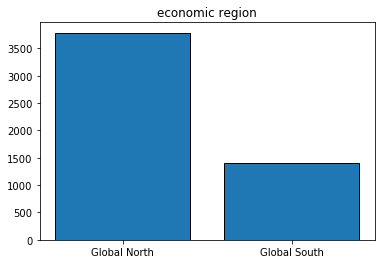

In [9]:
x = ['Global North', 'Global South']
a = len(df[(df["economic_region"]=="Global North")])
b = len(df[(df["economic_region"]=="Global South")])
y1 = np.array([a, b])

plt.figure(figsize=(6,4))
p = plt.bar(x, y1,edgecolor="k")
plt.title("economic region")
plt.show()

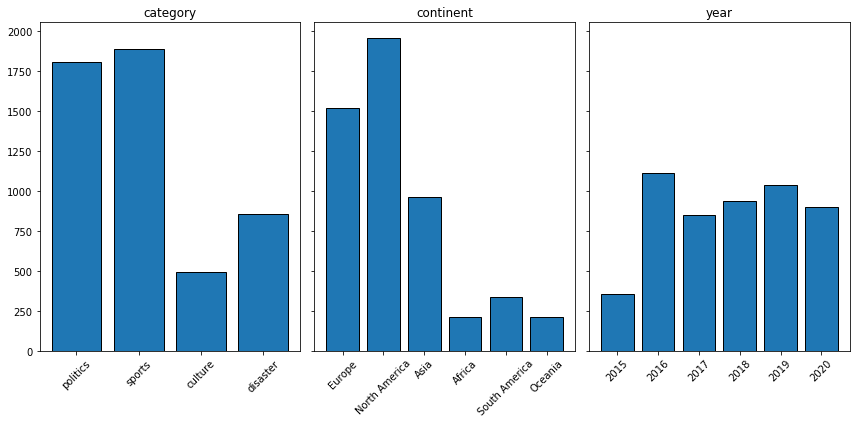

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 6),tight_layout=True)

x = ['politics', 'sports','culture', 'disaster']
a = len(df[(df["cat"]=="politics")])
b = len(df[(df["cat"]=="sports")])
c = len(df[(df["cat"]=="culture")])
d = len(df[(df["cat"]=="disaster")])
y1 = np.array([a, b, c, d,])

bar1 = axs[0].bar(x, y1,edgecolor="k")
axs[0].set_title("category")
axs[0].tick_params(axis='x', labelrotation=45 )

x = ['Europe', 'North America','Asia', 'Africa','South America', 'Oceania']
a = len(df[(df["continent"]=="Europe")])
b = len(df[(df["continent"]=="North America")])
c = len(df[(df["continent"]=="Asia")])
d = len(df[(df["continent"]=="Africa")])
e = len(df[(df["continent"]=="South America")])
f = len(df[(df["continent"]=="Oceania")])
y1 = np.array([a, b, c, d, e, f])

bar2 = axs[1].bar(x, y1,edgecolor="k")
axs[1].set_title("continent")
axs[1].tick_params(axis='x', labelrotation=45 )

x = ['2015', '2016','2017', '2018','2019','2020']
a = len(df[(df["year"]==2015)])
b = len(df[(df["year"]==2016)])
c = len(df[(df["year"]==2017)])
d = len(df[(df["year"]==2018)])
e = len(df[(df["year"]==2019)])
f = len(df[(df["year"]==2020)])
y1 = np.array([a, b, c, d, e, f])

bar3 = axs[2].bar(x, y1,edgecolor="k")
axs[2].set_title("year")
axs[2].tick_params(axis='x', labelrotation=45 )

plt.show()

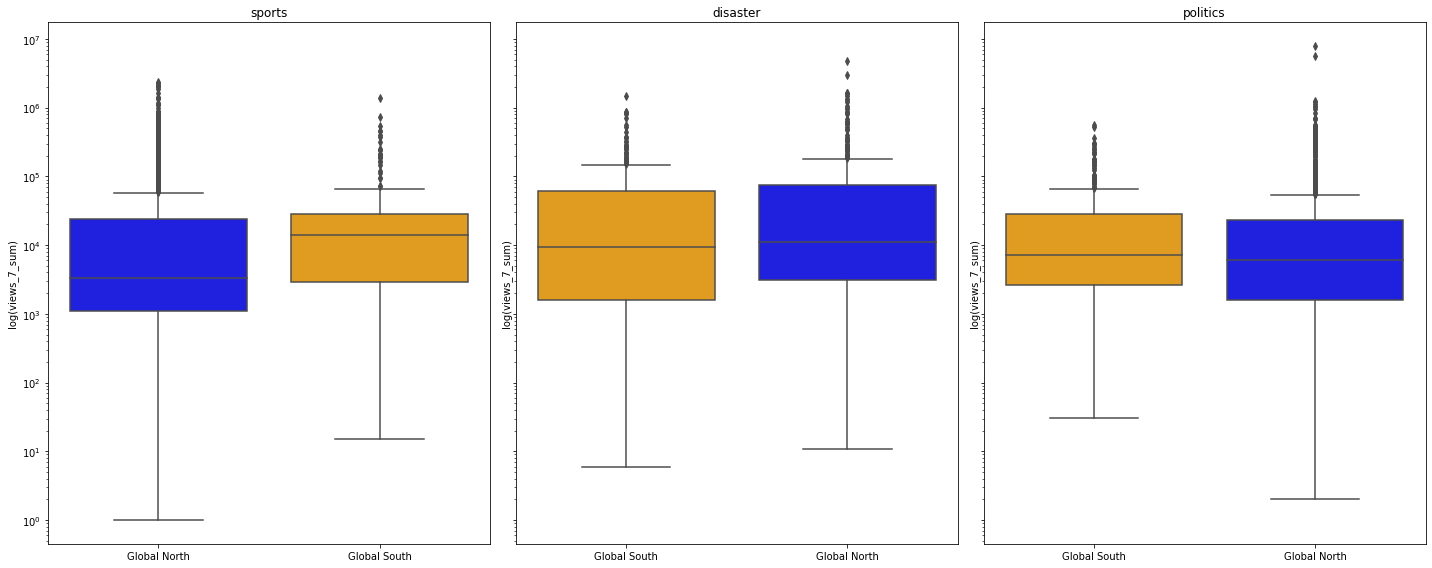

In [11]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 8),tight_layout=True)

my_pal = {"Global North": "b", "Global South": "orange"}
box_plot = sns.boxplot(  x="economic_region", y="views_7_sum", palette=my_pal, data=df[df["cat"]=="sports"],  ax=axs[0])
box_plot.set(xlabel='',ylabel='log(views_7_sum)')
box_plot.set_yscale('log')
box_plot.set(title='sports')

my_pal = {"Global North": "b", "Global South": "orange"}
box_plot1 = sns.boxplot(  x="economic_region", y="views_7_sum", palette=my_pal, data=df[df["cat"]=="disaster"],  ax=axs[1])
box_plot1.set(xlabel='',ylabel='log(views_7_sum)')
box_plot1.set_yscale('log')
box_plot1.set(title='disaster')

my_pal = {"Global North": "b", "Global South": "orange"}
box_plot2 = sns.boxplot(  x="economic_region", y="views_7_sum", palette=my_pal, data=df[df["cat"]=="politics"],  ax=axs[2])
box_plot2.set(xlabel='',ylabel='log(views_7_sum)')
box_plot2.set_yscale('log')
box_plot2.set(title='politics')

plt.show()

In [12]:
df[(df.factor =="before") & (df.cat == "disaster")]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean
53,Palmyra offensive (July–August 2015),2015-08-04T00:00:00Z,Global South,Asia,disaster,"['Category:August 2015 events in Asia', 'Categ...",13522,0.000000,0,0,0,0.0,0,"[20, 567, 867, 1484, 831, 726, 1151]",-13,2015,planed,not_surprising,before,806.571429
112,2015 China Victory Day Parade,2015-09-03T00:00:00Z,Global South,Asia,disaster,"['Category:2010s in Beijing', 'Category:2015 i...",20133,0.000000,0,0,0,0.0,0,"[301, 1851, 2007, 2301, 2806, 1181]",-15,2015,planed,not_surprising,before,1741.166667
358,2015 Brussels lockdown,2015-11-26T00:00:00Z,Global North,Europe,disaster,"['Category:2015 in Brussels', 'Category:Articl...",4689,2029.000000,8116,2703,1364,2024.5,-155,"[914, 690, 517, 245, 172, 113, 118]",-4,2015,planed,not_surprising,before,395.571429
524,2016 southern Taiwan earthquake,2016-02-06T00:00:00Z,Global North,Asia,disaster,"['Category:2016 earthquakes', 'Category:2016 i...",102584,0.000000,0,0,0,0.0,0,[],-1,2016,planed,not_surprising,before,0.000000
685,2016 Dwars door Vlaanderen,2016-03-23T00:00:00Z,Global North,Europe,disaster,"['Category:2016 UCI Europe Tour', 'Category:20...",657,31.000000,31,31,31,31.0,0,"[299, 124, 53, 59, 51, 36, 35]",-1,2016,planed,not_surprising,before,93.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2020 Delaware lieutenant gubernatorial election,2020-11-03T00:00:00Z,Global North,North America,disaster,"['Category:2020 Delaware elections', 'Category...",491,20.000000,140,25,13,23.0,2,"[57, 211, 67, 37, 37, 41, 33]",-758,2020,planed,not_surprising,before,69.000000
6135,2020 United States Senate election in Delaware,2020-11-03T00:00:00Z,Global North,North America,disaster,"['Category:2020 Delaware elections', 'Category...",11408,518.714286,3631,674,380,496.0,125,"[1017, 2974, 1412, 1607, 1683, 1682, 997]",-1573,2020,planed,not_surprising,before,1624.571429
6141,2020 Delaware gubernatorial election,2020-11-03T00:00:00Z,Global North,North America,disaster,"['Category:2020 Delaware elections', 'Category...",4029,251.285714,1759,397,214,225.0,183,"[691, 806, 472, 393, 485, 725, 415]",-1448,2020,planed,not_surprising,before,569.571429
6186,2020 Delaware State Senate election,2020-11-03T00:00:00Z,Global North,North America,disaster,"['Category:2020 Delaware elections', 'Category...",3343,22.142857,155,35,11,25.0,2,"[50, 1818, 655, 210, 159, 215, 139]",-48,2020,planed,not_surprising,before,463.714286


In [13]:
#df = df.drop(index = [148,674,679])
df = df[~((df.factor =="before") & (df.cat == "disaster"))]


correlation:  (0.7032736074706116, 0.0)


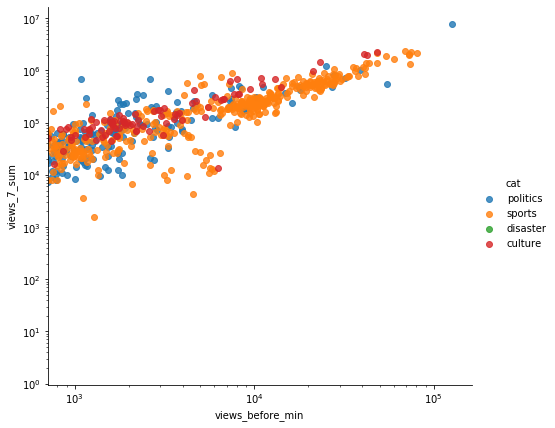

In [14]:
x = df['views_before_min']
y = df['views_7_sum']
print("correlation: ",scipy.stats.pearsonr(x, y) )
splot=sns.lmplot( x="views_before_min", y="views_7_sum", data=df, fit_reg=False, hue='cat', legend=True, height=6, aspect=1.2)
splot.set(yscale="log")
splot.set(xscale="log")
splot.set(title="")
plt.show()

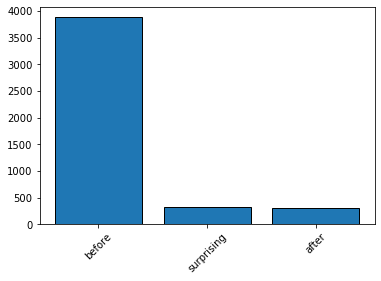

In [15]:
x = ['before', 'surprising','after']
a = len(df[(df["factor"]=="before")])
b = len(df[(df["factor"]=="surprising")])
c = len(df[(df["factor"]=="after")])
y1 = np.array([a, b, c])

plt.figure(figsize=(6,4))
p = plt.bar(x, y1,edgecolor="k")
plt.title("")
plt.xticks(rotation=45)
plt.show()

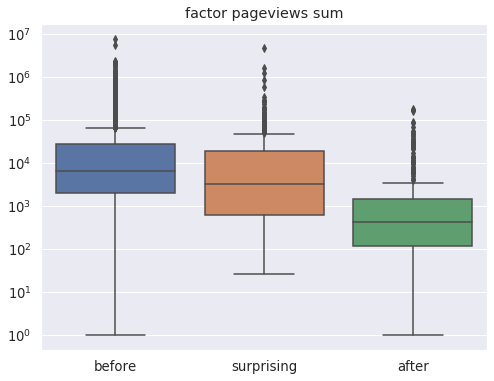

In [16]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
box_plot = sns.boxplot(  x="factor", y="views_7_sum", data=df)
box_plot.set(xlabel='',ylabel='')
box_plot.set_yscale('log')
box_plot.set(title='factor pageviews sum')
plt.show()

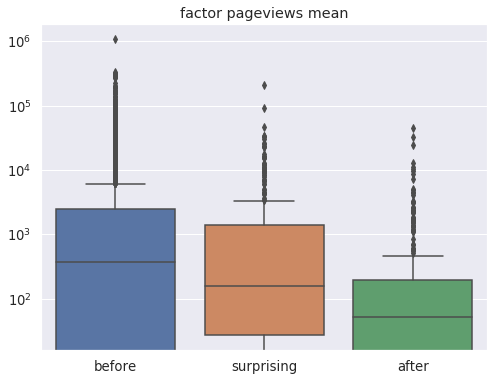

In [17]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
box_plot = sns.boxplot(  x="factor", y="views_7_days_mean", data=df)
box_plot.set(xlabel='',ylabel='')
box_plot.set_yscale('log')
box_plot.set(title='factor pageviews mean')
plt.show()

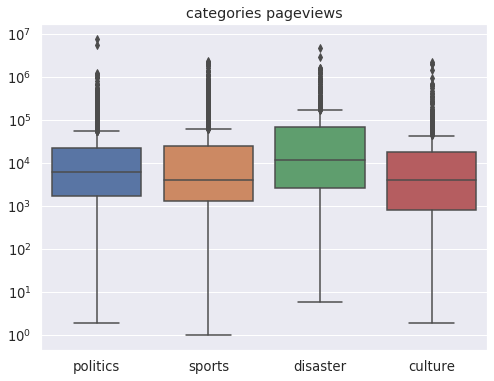

In [18]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
box_plot = sns.boxplot(  x="cat", y="views_7_sum", data=df)
box_plot.set(xlabel='',ylabel='')
box_plot.set_yscale('log')
box_plot.set(title='categories pageviews')
plt.show()

In [25]:
d = {'views_before_sum': df['views_before_sum'].apply(lambda x:np.log(x+1)),
     'views_before_mean': df['views_before_mean'].apply(lambda x:np.log(x+1)),
     'views_before_median': df['views_before_median'].apply(lambda x:np.log(x+1)),
     'views_before_max': df['views_before_max'].apply(lambda x:np.log(x+1)),
     'views_before_min': df['views_before_min'].apply(lambda x:np.log(x+1)),
     'views_before_increase': df['views_before_increase'].apply(lambda x:np.log(x+abs(min(df.views_before_increase))+1)),
     'views_7_sum': df['views_7_sum'].apply(lambda x:np.log(x+1)),
     'diff_days':df['diff_days'].apply(lambda x:np.log(x+abs(min(df.diff_days))+1)),
     'economic_region':df['economic_region'],
     'cat': df['cat'],
     'planed':df['planed'],
     'surprising': df['surprising'],
     'factor':df['factor']
    }
data = pd.DataFrame(data=d)

In [26]:
model = smf.ols(formula='views_7_sum ~ (views_before_min*cat)+(factor*economic_region)',data=data).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     351.6
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:35:11   Log-Likelihood:                -8204.5
No. Observations:                4370   AIC:                         1.643e+04
Df Residuals:                    4358   BIC:                         1.651e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                4.5702      0.184     24.828      0.000       4.209       4.931
cat[T.disaster]                                          3.4120      0.185     18.418      0.000       3.049       3.775
cat[T.politics]                                          2.7423      0.148     18.556      0.000       2.453       3.032
cat[T.sports]                                            0.1150      0.156      0.736      0.462      -0.191       0.421
factor[T.before]                                         0.9786      0.148      6.630      0.000       0.689       1.268
factor[T.surprising]                                     1.4440      0.172      8.419      0.000       1.108       1.780
economic_region[T.Global South]                         -1.0654      0.192     -5.545      0.000      -1.442      -0.689
factor[T.before]:economic_region[T.Global South]         1.2681      0.202      6.285      0.000       0.873       1.664
factor[T.surprising]:economic_region[T.Global South]     0.5312      0.267      1.986      0.047       0.007       1.055
views_before_min                                         0.7066      0.029     24.782      0.000       0.651       0.763
views_before_min:cat[T.disaster]                      2.751e-15   2.34e-16     11.780      0.000    2.29e-15    3.21e-15
views_before_min:cat[T.politics]                        -0.4997      0.031    -16.010      0.000      -0.561      -0.439
views_before_min:cat[T.sports]                          -0.0353      0.031     -1.137      0.256      -0.096       0.026
==============================================================================
Omnibus:                      182.613   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.713
Skew:                           0.280   Prob(JB):                     1.75e-84
Kurtosis:                       4.344   Cond. No.                     6.60e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.1e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
model = smf.ols(formula='views_7_sum ~ (views_before_min*cat)+(factor*economic_region)+(diff_days*factor)',data=data).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     326.5
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:06:27   Log-Likelihood:                -8106.2
No. Observations:                4370   AIC:                         1.624e+04
Df Residuals:                    4356   BIC:                         1.633e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                              108.2798     30.880      3.506      0.000      47.739     168.821
cat[T.disaster]                                          3.4093      0.181     18.816      0.000       3.054       3.765
cat[T.politics]                                          2.6096      0.145     18.015      0.000       2.326       2.894
cat[T.sports]                                            0.1793      0.153      1.172      0.241      -0.121       0.479
factor[T.before]                                       -71.9680     30.966     -2.324      0.020    -132.676     -11.260
factor[T.surprising]                                     0.0182      0.002      8.184      0.000       0.014       0.023
economic_region[T.Global South]                         -1.0417      0.188     -5.539      0.000      -1.410      -0.673
factor[T.before]:economic_region[T.Global South]         1.2208      0.198      6.181      0.000       0.834       1.608
factor[T.surprising]:economic_region[T.Global South]     0.5174      0.262      1.978      0.048       0.004       1.030
views_before_min                                         0.7056      0.028     25.302      0.000       0.651       0.760
views_before_min:cat[T.disaster]                     -9.379e-14   3.17e-14     -2.954      0.003   -1.56e-13   -3.16e-14
views_before_min:cat[T.politics]                        -0.5314      0.031    -17.360      0.000      -0.591      -0.471
views_before_min:cat[T.sports]                          -0.0547      0.030     -1.798      0.072      -0.114       0.005
diff_days                                              -11.9575      3.560     -3.359      0.001     -18.937      -4.978
diff_days:factor[T.before]                               8.3975      3.570      2.352      0.019       1.399      15.396
diff_days:factor[T.surprising]                           0.1575      0.019      8.184      0.000       0.120       0.195
==============================================================================
Omnibus:                      192.152   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.546
Skew:                           0.141   Prob(JB):                    8.63e-127
Kurtosis:                       4.763   Cond. No.                     1.50e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.97e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""